In [55]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np
from rdkit import Chem
from rdkit.Chem import Descriptors

In [4]:
train_data = pd.read_csv('data/HSP_descriptors_NO_ERRS_ZEROS.csv',index_col=0)
train_data

,al,CAS,smiles,ABC,ABCGG,SpAbs_A,SpMax_A,SpDiam_A,SpAD_A,SpMAD_A,...,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2,δD,δP,δH
0,"1,1,1,2-Tetrachloroethane",b'630-20-6',ClCC(Cl)(Cl)Cl,4.012290,4.284816,5.818626,2.074313,4.148627,5.818626,0.969771,...,20.736383,28,3,24.0,22.0,4.312500,1.375000,18.0,4.4,4.2
1,"1,1,1-Trichloroethane",b'71-55-6',CC(Cl)(Cl)Cl,3.464102,3.464102,4.000000,2.000000,4.000000,4.000000,0.800000,...,16.491254,16,0,20.0,16.0,4.062500,1.000000,16.8,4.3,2.0
2,"1,1,1-Trifluoroethane",b'420-46-2',CC(F)(F)F,3.464102,3.464102,4.000000,2.000000,4.000000,4.000000,0.800000,...,10.502336,16,0,20.0,16.0,4.062500,1.000000,14.6,10.0,0.0
3,"1,1,2,2-Tetrabromoethane",b'79-27-6',BrC(Br)C(Br)Br,3.932653,4.244375,6.000000,2.000000,4.000000,6.000000,1.000000,...,42.711125,29,4,22.0,21.0,4.222222,1.444444,21.0,7.0,8.2
4,"1,1,2,2-Tetrachloroethane",b'79-34-5',ClC(Cl)C(Cl)Cl,3.932653,4.244375,6.000000,2.000000,4.000000,6.000000,1.000000,...,20.736383,29,4,22.0,21.0,4.222222,1.444444,18.8,5.1,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1187,Quinine,b'130-95-0',[H][C@@]1([C@@H](C2=CC=NC3=CC=C(C=C23)OC)O)C[C...,18.958632,14.851657,32.595631,2.494948,4.989896,32.595631,1.358151,...,6.753829,1286,42,132.0,161.0,7.000000,5.333333,19.0,6.6,11.0
1188,Sulfur Dioxide,b'9/5/7446',O=S=O,1.414214,1.414214,2.828427,1.414214,2.828427,2.828427,0.942809,...,21.320633,4,0,6.0,4.0,2.250000,1.000000,15.8,8.4,10.0
1189,Thionyl Chloride,b'9/7/7719',O=S(Cl)Cl,2.449490,2.449490,3.464102,1.732051,3.464102,3.464102,0.866025,...,29.476173,9,0,12.0,9.0,3.111111,1.000000,16.9,6.4,6.1
1190,Triethylene Glycol Monooleyl Ether,b'5274-66-8',COCCOCCOCCO,7.071068,6.765664,13.191508,1.931852,3.863703,13.191508,1.199228,...,6.077958,220,8,38.0,36.0,4.250000,3.000000,16.0,3.1,8.4


In [12]:
HSPs = ['δD','δP','δH']
train_hsp = train_data[['smiles']+HSPs]
train_hsp['total'] = np.sqrt(train_hsp['δD']**2+train_hsp['δP']**2+train_hsp['δH']**2)
train_hsp

/tmp/ipykernel_66864/2629748510.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_hsp['total'] = np.sqrt(train_hsp['δD']**2+train_hsp['δP']**2+train_hsp['δH']**2)


,smiles,δD,δP,δH,total
0,ClCC(Cl)(Cl)Cl,18.0,4.4,4.2,19.000000
1,CC(Cl)(Cl)Cl,16.8,4.3,2.0,17.456517
2,CC(F)(F)F,14.6,10.0,0.0,17.696327
3,BrC(Br)C(Br)Br,21.0,7.0,8.2,23.605931
4,ClC(Cl)C(Cl)Cl,18.8,5.1,5.3,20.187620
...,...,...,...,...,...
1187,[H][C@@]1([C@@H](C2=CC=NC3=CC=C(C=C23)OC)O)C[C...,19.0,6.6,11.0,22.925095
1188,O=S=O,15.8,8.4,10.0,20.498780
1189,O=S(Cl)Cl,16.9,6.4,6.1,19.073018
1190,COCCOCCOCCO,16.0,3.1,8.4,18.334939


In [27]:
from matplotlib import rcParams
rcParams['font.family'] = 'Georgia'

sns.set_style('whitegrid')
sns.set_context("paper")

# Number of atoms and molecular weight

In [59]:
train_hsp['NumAtoms'] = train_hsp['smiles'].apply(lambda x: Chem.MolFromSmiles(x).GetNumAtoms())
train_hsp['MolWeight'] = train_hsp['smiles'].apply(lambda x: Descriptors.ExactMolWt(Chem.MolFromSmiles(x)))
train_hsp

[15:46:16] WARNING: not removing hydrogen atom without neighbors
[15:46:16] WARNING: not removing hydrogen atom without neighbors
/tmp/ipykernel_66864/1006919885.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_hsp['NumAtoms'] = train_hsp['smiles'].apply(lambda x: Chem.MolFromSmiles(x).GetNumAtoms())
[15:46:16] WARNING: not removing hydrogen atom without neighbors
[15:46:16] WARNING: not removing hydrogen atom without neighbors
/tmp/ipykernel_66864/1006919885.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-ver

,smiles,δD,δP,δH,total,NumAtoms,MolWeight
0,ClCC(Cl)(Cl)Cl,18.0,4.4,4.2,19.000000,6,165.891061
1,CC(Cl)(Cl)Cl,16.8,4.3,2.0,17.456517,5,131.930033
2,CC(F)(F)F,14.6,10.0,0.0,17.696327,5,84.018685
3,BrC(Br)C(Br)Br,21.0,7.0,8.2,23.605931,6,341.688998
4,ClC(Cl)C(Cl)Cl,18.8,5.1,5.3,20.187620,6,165.891061
...,...,...,...,...,...,...,...
1187,[H][C@@]1([C@@H](C2=CC=NC3=CC=C(C=C23)OC)O)C[C...,19.0,6.6,11.0,22.925095,24,324.183778
1188,O=S=O,15.8,8.4,10.0,20.498780,3,63.961900
1189,O=S(Cl)Cl,16.9,6.4,6.1,19.073018,4,117.904691
1190,COCCOCCOCCO,16.0,3.1,8.4,18.334939,11,164.104859


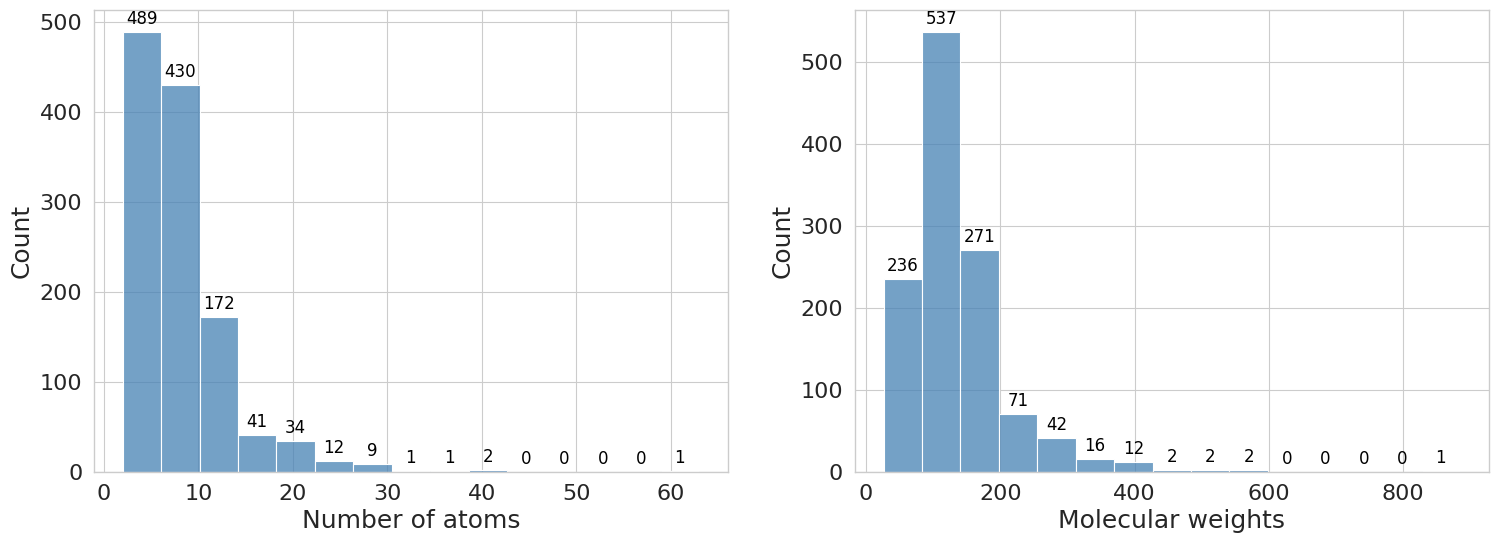

In [80]:
fig, axs = plt.subplots(1, 2, figsize=(18, 6))
colors = ['steelblue', 'steelblue']

# Your histogram plotting code here...
num_atoms_hist = sns.histplot(train_hsp['NumAtoms'], ax=axs[0], bins=15, color=colors[0])
mol_weight_hist = sns.histplot(train_hsp['MolWeight'], ax=axs[1], bins=15, color=colors[1])

axs[0].set_xlabel(r'Number of atoms', fontsize=18)
axs[0].set_ylabel(r'Count', fontsize=18)
axs[1].set_xlabel(r'Molecular weights', fontsize=18)
axs[1].set_ylabel(r'Count', fontsize=18)

# Set tick label font sizes
tick_label_fontsize = 16
for ax in axs.flatten():
    ax.tick_params(axis='both', which='major', labelsize=tick_label_fontsize)

# Annotate each bin with its count
for ax, hist_data in zip(axs, [num_atoms_hist, mol_weight_hist]):
    for rect in hist_data.patches:
        height = rect.get_height()
        ax.annotate(f'{int(height)}', xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=12, color='black')
fig.savefig('figs/Train_NA_MW.pdf',dpi=300)

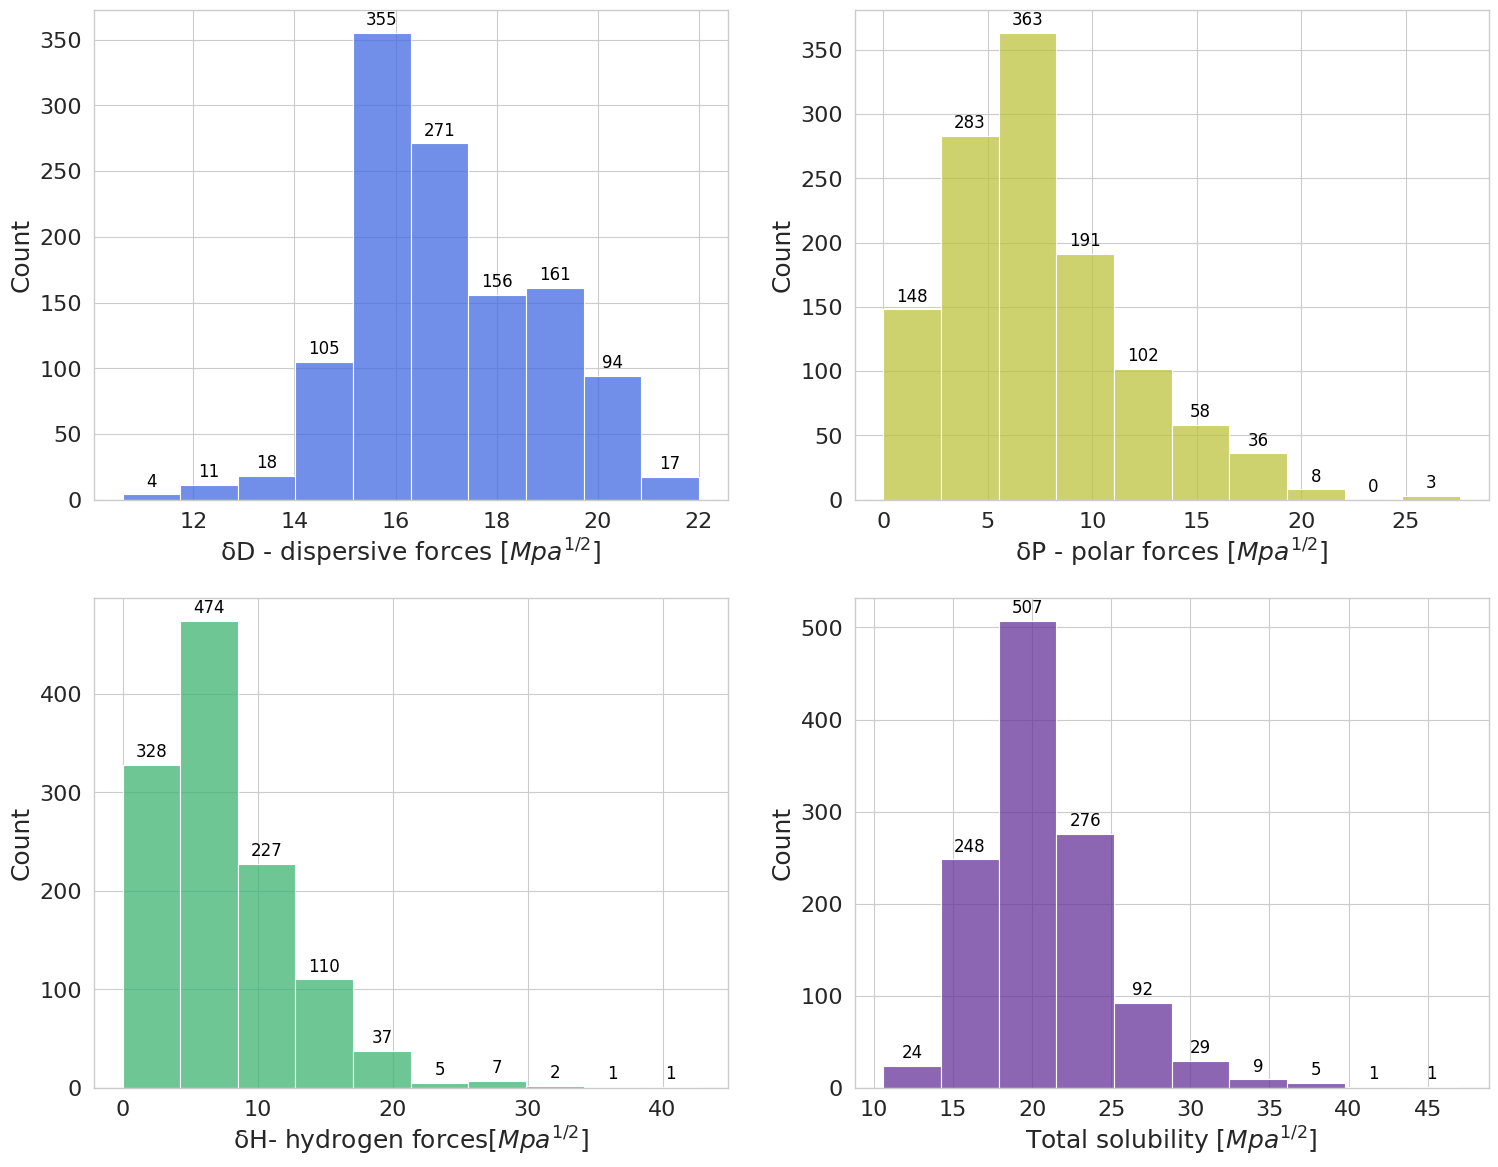

In [81]:
fig,axs = plt.subplots(2,2,figsize=(18,14))

d_hist = sns.histplot(train_hsp['δD'],bins=10,ax=axs[0][0],color='royalblue')
p_hist = sns.histplot(train_hsp['δP'],bins=10,ax=axs[0][1],color='#bdc23d')
h_hist = sns.histplot(train_hsp['δH'],bins=10,ax=axs[1][0],color='mediumseagreen')
t_hist = sns.histplot(train_hsp['total'],bins=10,ax=axs[1][1],color='rebeccapurple')

# Set x-axis and y-axis label font sizes
label_fontsize = 18
axs[0, 0].set_xlabel(r'δD - dispersive forces [$Mpa^{1/2}$]', fontsize=label_fontsize)
axs[0, 0].set_ylabel(r'Count', fontsize=label_fontsize)

axs[0, 1].set_xlabel(r'δP - polar forces [$Mpa^{1/2}$]', fontsize=label_fontsize)
axs[0, 1].set_ylabel(r'Count', fontsize=label_fontsize)

axs[1, 0].set_xlabel(r'δH- hydrogen forces[$Mpa^{1/2}$]', fontsize=label_fontsize)
axs[1, 0].set_ylabel(r'Count', fontsize=label_fontsize)

axs[1, 1].set_xlabel(r'Total solubility [$Mpa^{1/2}$]', fontsize=label_fontsize)
axs[1, 1].set_ylabel(r'Count', fontsize=label_fontsize)

# Set tick label font sizes
tick_label_fontsize = 16
for ax in axs.flatten():
    ax.tick_params(axis='both', which='major', labelsize=tick_label_fontsize)


# Annotate each bin with its count
for ax, hist_data in zip(axs.flatten(), [d_hist,p_hist,h_hist,t_hist]):
    for rect in hist_data.patches:
        height = rect.get_height()
        ax.annotate(f'{int(height)}', xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=12, color='black')

fig.savefig('figs/Train_HSPT_histograms.pdf',dpi=300)

# Error analysis (validation sets)